<a href="https://colab.research.google.com/github/abderrahmaneaziri/gan/blob/main/MY_GAN_SIMPLIFIED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce code je vais essayer d'mplémenter un Generative Adversarial Network (GAN) à partir en Python en utilisant TensorFlow et Keras. À l'aide de deux ensembles de données Kaggle contenant des images de visages humains, ce GAN est formé pour générer des visages humains.

premierement je suis un tutoriel pour pouvoir creer un generateur et un discriminateur pour une image corresponante à 2x2 pixels.
Ce code est inspiré d'un tutoriel youtube : https://www.youtube.com/watch?v=8L11aMN5KY8&ab_channel=Serrano.Academy

# Pricipe : 

Je vais essayer de coder une paire de réseaux de neurones à une couche d'une manière très très simple, si simple que je n'ai besoin d'aucune base de données et que je pourrai les coder directement sur mon ordinateur sans aucun package d'apprentissage en profondeur. La vidéo youtube l'explique comme ceci *"C'est notre cadre : nous vivons dans un monde appelé terre inclinée où tout le monde a l'air légèrement allongé et marche à un angle de 45 degrés ce monde a une technologie mais pas aussi développé que le nôtre, ils ont des écrans d'ordinateur qui affichent des images mais la meilleure résolution qu'ils ont pu trouver est de 2 fois 2, ils ont donc des écrans noir et blanc de 2 pixels sur 2. Ils ont également développé des réseaux de neurones, mais seulement des réseaux très simples, en fait, ils ne connaissent que les réseaux de neurones d'une couche, mais je vais vous montrer que dans ce monde simple, nous pouvons toujours créer une paire de GAN qui généreront les visages des personnes qui vivent dans la terre inclinée". [[1,0],[0,1]] Voici à quoi ressemblent les images des personnes à l'écran. Et les images bruyantes ressemblent à des pixels aléatoires entre le noir et le blanc, elles ne sont pas considérées comme des visages car elles ne ressemblent pas à un contrecoup. Celles-ci sont principalement générées de manière aléatoire, de sorte que l'objectif des réseaux est de pouvoir distinguer les visages comme ceux-ci des images bruyantes ou des non-visages.

attachons quelques chiffres ici nous aurons une échelle où un pixel blanc a des valeurs de 0 et un pixel noir a une valeur de 1 l dans les écrans 2 x 2, nous sommes prêts à construire nos réseaux.
Commençons par construire le discriminateur. La première question est de savoir comment distinguer les visages des non-visages. on remarque que dans les faces les coins haut gauche et bas droit ont de grandes valeurs car ou les pixels sont sombres alors que les deux autres coins ont de petites valeurs car leurs pixels sont clairs par contre dans les images bruitées tout peut arriver donc la façon de le dire faces à part est en additionnant les deux valeurs correspondant aux coins supérieur gauche et inférieur droit et en soustrayant les valeurs correspondant aux deux autres coins et faces ce résultat sera très élevé alors que dans les images bruitées il sera faible par exemple pour un visage la valeur est de 2 et la valeur de l'image de bruit est de moins 0,5, nous pouvons ajouter une coupure ou un seuil de 1, par exemple. Nous pouvons dire que toute image qui a 1 ou plus est un visage et que tout non-visage est inférieur à 1, c'est ainsi les choses semblent les valeurs de nos 4 pixels sont multipliées par plus ou moins 1 en fonction de la diagonale sur laquelle ils se trouvent, puis nous soustrayons une valeur totale de 1 ou le biais, nous ajoutons ces 4 nombres et si le score est de 1 ou plus que l'image est classé comme af as et s'il est inférieur à 1, il est classé comme n'étant pas un visage.


On met la probabilité que quelque chose soit un visage en utilisant la fonction sigmoïde on applique la sigmoïde qui est cette fonction qui envoie les nombres hauts aux nombres proches de 1 et les nombres bas les nombres proches de 0 et on obtient la sigmoïde de 1 qui est 0.73 le discriminateur Le réseau attribue alors à cette image une probabilité de 73% que ce soit un visage puisque c'est une forte probabilité supérieure à 50% on en déduit que le discriminateur pense que l'image est un visage ce qui est correct. notez que dans ce réseau de neurones, les bords épais sont positifs et que les minces sont négatifs et c'est une convention que nous utiliserons tout au long. maintenant si nous entrons la deuxième image qui n'est pas un visage dans un discriminateur alors nous faisons le même calcul nous obtenons moins 0,5 pour le score sigmoïde de moins 0,5 est de 0,37 c'est inférieur à 50% donc nous concluons que ce discriminateur pense que cette image n'est pas un visage, le discriminateur est à nouveau correct. maintenant, de la même manière, construisons un générateur, c'est un réseau de neurones qui produira des visages. Construire un générateur tiendra à nouveau compte de cette probabilité. le générateur fonctionne d'abord en choisissant un ensemble d'entrées qui est un nombre aléatoire entre 0 et 1, disons que ce sera 0,7. en général, l'entrée sera un vecteur provenant d'une distribution fixe. construisons maintenant un réseau de neurones. ce que nous voulons vraiment, c'est avoir de grandes valeurs et d'autres petites. car rappelez-vous que nous voulons de grandes valeurs pour les coins supérieur gauche et inférieur droit et de petites valeurs pour les coins supérieur droit et inférieur gauche. donc puisque la sortie supérieure doit être grande, nous voulons que ces poids soient grands, alors faisons-les plus 1 maintenant, qu'obtenons-nous pour la sortie, nous allons d'abord obtenir un score de plus 1 x0,7 + 1 qui est 1,7 regardons maintenant la deuxième valeur correspondant au coin supérieur droit. il doit s'agir d'une petite valeur, alors mettons des nombres négatifs ici, qu'obtenons-nous pour le score que nous obtenons -1x 0,7 -1 qui est -1,7. de la même manière, nous voulons une petite valeur ici, nous mettons donc des poids de -1 et nous obtenons 0,7 . pour le dernier on est sur une valeur plus élevée donc on met des plus un et on obtient plus une fois 0,7 +1 soit 1,7. maintenant ce ne sont que les scores dont nous avons besoin pour appliquer sigmoïde pour trouver les probabilités donc nous appliquons le sigmoïde et nous obtenons 0,85, 0,15, 0,15, , 0,85 ce sont les valeurs qui iront dans nos pixels et notons que notre image ressemble à une diagonale c'est ainsi que nous définissons nos visages. remarqué par la façon dont nous avons construit ce réseau de neurones, il générera toujours de grandes valeurs pour les coins supérieur gauche et inférieur droit et de petites valeurs pour les coins supérieur droit et inférieur gauche, quelles que soient les valeurs que nous saisissons car rappelez-vous que c'est entre 0 & 1, donc ce réseau de neurones générera toujours un visage qui signifie que c'est un bon générateur. bien sûr, j'ai construit ces réseaux de neurones en observant les poids, mais ce n'est pas comme ça que ça se fait normalement en général, nous devons former les réseaux de neurones pour obtenir les meilleurs poids possibles. pour les fonctions d'erreur ou la fonction de coût, elles sont un moyen de dire si le réseau va bien ou mal, afin qu'il s'améliore. si l'erreur est importante, le réseau ne fonctionne pas bien et il doit réduire l'erreur pour améliorer la fonction d'erreur. si nous avons une étiquette de 1 et que notre réseau de neurones l'a prédit comme 0,1, c'est une mauvaise prédiction et nous devrions produire une grande erreur car 0,1 est très loin de ce que d'autre part c'était l'étiquette est 1 et la prédiction est 0,9 alors c'est une bonne prédiction car la prédiction est très proche de l'étiquette. donc cela devrait produire une petite erreur. notez que le logarithme naturel négatif de 0,1 est 2,3 ce qui est grand tandis que le logarithme négatif de 0,9 est 0,1 ce qui est faible, plus le nombre est proche de 1, plus le logarithme négatif est petit donc lorsque l'étiquette est 1. la fonction logarithme négatif du la prédiction est une bonne fonction d'erreur. maintenant allons dans l'autre extrême quand l'étiquette est 0 dans ce cas si on avait une prédiction de 0.1 ce serait bien car c'est proche de l'étiquette donc l'erreur devrait être petite par contre une prédiction de 0.9 c'est terrible donc le l'erreur devrait être grande la fonction dont nous avons besoin ici est similaire à la précédente avec une légère différence c'est le logarithme négatif si nous voulons que la prédiction soit 0 ou 1 que nous avons nos fonctions, nous pouvons accéder à notre processus de formation. qui est la rétropropagation. très brièvement la façon dont nous formons vos réseaux en prenant d'abord un point de données et en effectuant une passe avant en calculant la prédiction, puis en calculant l'erreur en fonction de la perte de journal que nous avons précédemment définie. puis nous procédons à prendre la dérivée de l'erreur basée sur tous les poids en utilisant la règle de la chaîne. cela nous dira combien obtenir chaque poids afin de diminuer au mieux l'erreur. la façon dont nous faisons l'erreur en utilisant une dérivée est un processus appelé descente de gradient que nous avons vu dans le cours d'optimisation. Pour faire court, ce que je fais, c'est que je trace les flèches en arrière, puis calcule le gradient qui est la direction de la plus grande croissance, puis fais un petit pas dans la direction du négatif de ce gradient afin de trouver de nouveaux paramètres qui diminuent cette erreur comme autant que possible. maintenant nous sommes prêts à former le générateur et le discriminateur et ce que nous devons faire est de mettre les bonnes fonctions d'erreur aux bons endroits. nous commençons par définir les poids comme des nombres aléatoires maintenant nous sélectionnons un nombre aléatoire entre 0 et 1 qui va servir d'entrée au générateur nous faisons un passage en avant du générateur pour obtenir une image qui n'est probablement pas un visage puisque les poids sont aléatoires, cela va être notre image générée maintenant nous passons cette image générée à travers le discriminateur, afin que le discriminateur puisse dire si c'est faux ou non le discriminateur génère une probabilité donc disons que c'est par exemple 0,68, alors c'est là nous définissons les fonctions d'erreur correctes, réfléchissons d'abord à ce que le discriminateur veut faire ici, en d'autres termes si le discriminateur était génial, que devrait-il bien produire puisque l'image n'est pas un visage mais c'est une image générée par le générateur alors le discriminateur devrait dire que c'est faux, cela signifie que le discriminateur devrait produire un 0. si nous nous souvenons de la fonction d'erreur, la façon dont nous mesurons une erreur lorsque nous voulons que le réseau de neurones produise un 0 est le logarithme négatif de 1 moins la prédiction. c'est une erreur qui nous aidera à former le discriminateur. maintenant que nous avons compris le discriminateur, passons au générateur que veut le générateur ? eh bien, les rêves les plus fous des générateurs sont de générer une image si bonne si réelle que le discriminateur la classe comme réelle, donc le générateur veut que tout ce réseau de neurones la connexion des deux sorte un 1, cela signifie que la fonction d'erreur du générateur est le logarithme négatif de la prédiction, c'est donc la fonction d'erreur qui nous aidera à former les poids du générateur, la descente de gradient nous aidera à mettre à jour les poids des deux réseaux de neurones afin d'améliorer cette prédiction particulière. notez que ces deux fonctions d'erreur se battent l'une contre l'autre, mais ce n'est pas grave car la fonction d'erreur ne modifie que les poids du générateur et la fonction d'erreur du discriminateur ne modifie que les poids du discriminateur, donc elles ne se heurtent pas, elles améliorent simplement les deux réseaux de neurones comme un seul pour produire des sorties différentes, ce qui est fascinant. donc ce que nous devons faire maintenant est de répéter ce processus plusieurs fois nous choisissons une valeur aléatoire pour Z nous appliquons le générateur pour produire une fausse image appliquons le discriminateur à cette image et utilisons la rétropropagation pour mettre à jour les poids sur le générateur et le discriminateur puis nous prenons une image réelle, la branchons sur un discriminateur sur des poids mis à jour en utilisant à nouveau la rétro-propagation

alors que se passe-t-il après plusieurs de ces itérations ou "époques" . le discriminateur n'est plus capable de distinguer les visages des non-visages et la raison en est que si nous nous souvenons depuis le début, les coins gauche et inférieur droit d'un visage doivent être grands et les deux autres doivent être petits. regardons le générateur, notez que puisque l'entrée est comprise entre 0 et 1 et que les deux bords sont positifs, la valeur sigmoïde de cette sortie est grande, ce qui correspond à la valeur de ce pixel ici, donc ce pixel a une grande valeur de la même manière ces 2 valeurs sont également positifs et ils nous donnent une grande valeur pour ce pixel ici maintenant ces deux ici sont négatifs donc ils nous donnent une petite valeur pour ce pixel et ces 2 ici négatifs donc ils nous donnent une petite valeur. donc notre image ressemble beaucoup à une diagonale et compte tenu de la résolution des écrans et du terrain incliné qui sont tous deux images par deux pixels et cette image ressemble à un habitant de terrain incliné, j'ai donc construit un réseau qui génère des visages. j'ai aussi des tracés de fonction d'erreur, nous pouvons tracer la fonction d'erreur pour le générateur et la fonction d'erreur pour le discriminateur, la fonction d'erreur du générateur diminue et se stabilise, mais depuis le générateur et donc en suivant le discriminateur, la fonction discriminative ne fait pas si bien, et monte en fait à la fin, et enfin nous demandons à notre générateur de générer des images aléatoires et ici nous remarquons qu'elles ressemblent toutes à des visages en terre inclinée, ce que nous voulions depuis le début, nous avons donc réussi à créer un paire de GAN qui génèrent des visages dans un terrain incliné.

Maintenant, il est temps pour quelques remerciements, ce ne serait pas pareil si ce n'était de l'aide du tutoriel de la vidéo et de l'explication qu'il a donnée.

Merci baucoup pour votre temps. 




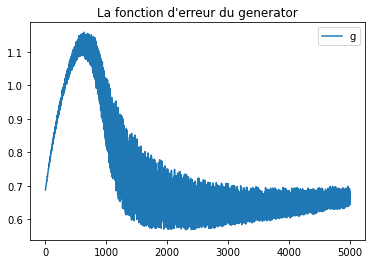

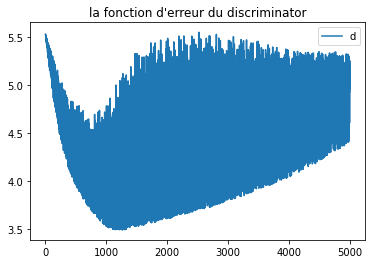

[0.90411679 0.07220377 0.03372723 0.81810813]
[0.95441488 0.04115529 0.015645   0.91873081]
[0.9420814  0.04926392 0.01997981 0.89411978]
[0.94961848 0.04436231 0.01732374 0.9091926 ]


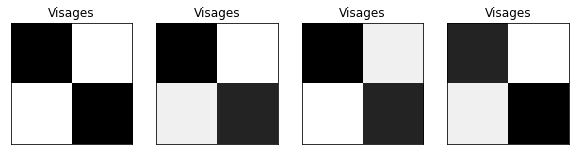

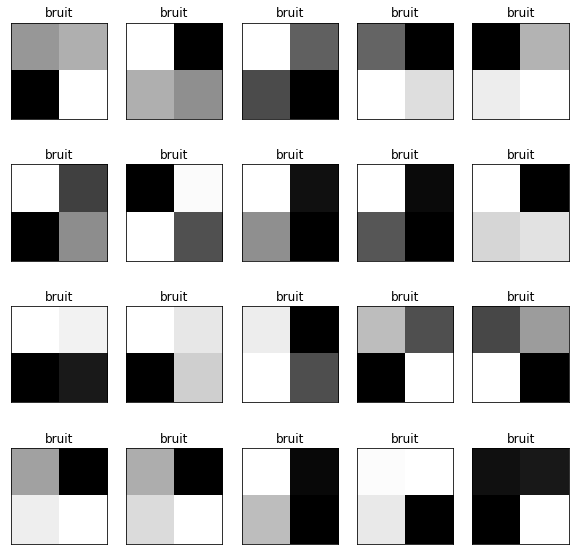

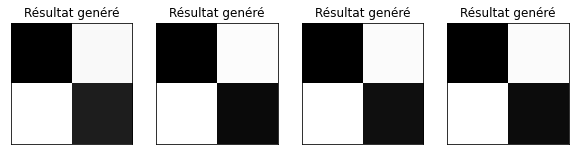

In [1]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt


def afficher(ech, m, n,Titre=''):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), ech):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.set_title(Titre)
        im = ax.imshow(1-img.reshape((2,2)), cmap='Greys_r')  
    return fig, axes, im,


def generer_images_aleatoires(k):
    #k est le nombre d'mages qu'on veut generer
    return [np.random.randn(2,2) for i in range(4*k)]



def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

class Discriminator():
    def __init__(self):
        self.poids = np.array([0.0 for i in range(4)])
        self.bias = 0.0
        #self.poids = np.array([np.random.normal() for i in range(4)])
        #self.bias = np.random.normal()
    
    def avance(self, x):
        # 
        return sigmoid(np.dot(x, self.poids) + self.bias)
    
    def erreur_image(self, image):
        prediction = self.avance(image)
        # on veut que la prédiction soit 1 , donc la fonction erreur est -log(prediction)
        return -np.log(prediction)
    
    def derriver_image(self, image):
        prediction = self.avance(image)
        derivatives_poids = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_poids, derivative_bias
    
    def changer_depuis_image(self, x):
        ders = self.derriver_image(x)
        self.poids -= vittesse_apprentisage * ders[0]
        self.bias -= vittesse_apprentisage * ders[1]

    def erreur_de_bruit(self, bruit):
        prediction = self.avance(bruit)
        # on veut que la prédiction soit 0 , donc la fonction erreur est -log(1-prediction)
        return -np.log(1-prediction)
    
    def derriver_bruit(self, bruit):
        prediction = self.avance(bruit)
        derivatives_poids = bruit * prediction
        derivative_bias = prediction
        return derivatives_poids, derivative_bias
    
    def changer_depuis_bruit(self, bruit):
        ders = self.derriver_bruit(bruit)
        self.poids -= vittesse_apprentisage * ders[0]
        self.bias -= vittesse_apprentisage * ders[1]

class Generator():
    def __init__(self):
        self.poids = np.array([np.random.normal() for i in range(4)])
        self.biases = np.array([np.random.normal() for i in range(4)])

    def avance(self, z):
        # avance pass
        return sigmoid(z * self.poids + self.biases)

    def erreur(self, z, discriminator):
        x = self.avance(z)
        #
        y = discriminator.avance(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_poids = discriminator.poids
        discriminator_bias = discriminator.bias
        x = self.avance(z)
        y = discriminator.avance(x)
        factor = -(1-y) * discriminator_poids * x *(1-x)
        derivatives_poids = factor * z
        derivative_bias = factor
        return derivatives_poids, derivative_bias

    def update(self, z, discriminator):
        erreur_avant = self.erreur(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.poids -= vittesse_apprentisage * ders[0]
        self.biases -= vittesse_apprentisage * ders[1]
        erreur_after = self.erreur(z, discriminator)
        
        
        
# Examples de pattern "visages"
visages = [np.array([1,0,0,1]),
         np.array([0.9,0.1,0.2,0.8]),
         np.array([0.9,0.2,0.1,0.8]),
         np.array([0.8,0.1,0.2,0.9]),
         np.array([0.8,0.2,0.1,0.9])]
    

# Examples d'images bruitées 

bruit = generer_images_aleatoires(5)

bruitinit=bruit



# on met un seed
np.random.seed(42)

# le vittesse et les epochs (hyperparametres)
vittesse_apprentisage = 0.01
epochs = 1000

# Le GAN
D = Discriminator()
G = Generator()

# Pour visualiser les erreurs
erreurs_discriminator = []
erreurs_generator = []

for epoch in range(epochs):
    
    for visage in visages:
        
        # on fait un update des poids du discriminateur à partir du vrai 'visage'
        D.changer_depuis_image(visage)
    
        # On prends n'importe quel num pour generer un faux visage
        z = random.rand()

        # on calcul l'erreur du discriminateur
        erreurs_discriminator.append(sum(D.erreur_image(visage) + D.erreur_de_bruit(z)))
        
        # on calcul l'erreur du generateur
        erreurs_generator.append(G.erreur(z, D))
        
        # on construit un faux visage
        bruit = G.avance(z)
        
        # on fait un update des  poids du discriminator visage fake
        D.changer_depuis_bruit(bruit)
    
        # on fait un update des poids du generator a partir du visage fake 
        G.update(z, D)

plt.subplot(1,1,1)
plt.plot(erreurs_generator)
plt.title("La fonction d'erreur du generator")
plt.legend("gen")
plt.show()
plt.subplot(1,1,1)
plt.plot(erreurs_discriminator)
plt.legend('disc')
plt.title("la fonction d'erreur du discriminator")
plt.show()

images_generes = []
for i in range(4):
    z = random.random()
    images_genere = G.avance(z)
    images_generes.append(images_genere)

_ = afficher(visages, 1, 4,'Visages')

_ =afficher(bruitinit, 4,5,'bruit')

_ = afficher(images_generes, 1, 4,'Résultat genéré')


# plt.subplot(2,4,1)
# _ = afficher(visages, 1, 4,'Visages')
# plt.subplot(2,4,2)
# _ = afficher(images_generes, 1, 4,'Résultat genéré')

for i in images_generes:
    print(i)

# print("Generator poids", G.poids)
# print("Generator biases", G.biases)

# print("Discriminator poids", D.poids)
# print("Discriminator bias", D.bias)